# Project Task: Week 1

Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.shape

(541909, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#checking if any missing values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Observation 1:

* The dataset we have has  541909 rows and 8 columns of data
* We see that all the data fields have a correct datatype format,so we need not do any data type casting
* There are 1454 missing Description(Product (item) name.) and 135080 missing CustomerID.
* The missing Customer ID's makes it dificult to analyse if the products were bought by the same Customer or multiple customers,therefore, I belive we can drop all the 135080 rows of data where we are missing the customer ID

In [6]:
# handling Missing values
    #Dropping all rows (135080) where the CustomerID is missing
    
filtered_df = df[df['CustomerID'].notna()]

In [7]:
filtered_df.shape

(406829, 8)

In [8]:
filtered_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# Checking and removing duplicates if any
if filtered_df.duplicated().sum().any()==True:
    print('There are duplicate values in the dataset')
else:
    print('There are no duplicate values in the dataset')

There are duplicate values in the dataset


In [11]:
filtered_df_dropped_duplicates = filtered_df.drop_duplicates(keep=False)

In [12]:
filtered_df_dropped_duplicates.shape

(396767, 8)

In [13]:
if filtered_df_dropped_duplicates.duplicated().sum().any()==True:
    print('There are duplicate values in the dataset')
else:
    print('There are no duplicate values in the dataset')

There are no duplicate values in the dataset


In [14]:
# Performing descriptive analytics

In [15]:
df_new = filtered_df_dropped_duplicates.copy()

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396767 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396767 non-null  object        
 1   StockCode    396767 non-null  object        
 2   Description  396767 non-null  object        
 3   Quantity     396767 non-null  int64         
 4   InvoiceDate  396767 non-null  datetime64[ns]
 5   UnitPrice    396767 non-null  float64       
 6   CustomerID   396767 non-null  float64       
 7   Country      396767 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.2+ MB


In [17]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,396767.0,12.298913,251.781170,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,396767.0,3.487053,70.187448,0.0,1.25,1.95,3.75,38970.0
CustomerID,396767.0,15275.108517,1714.401947,12346.0,13919.00,15132.00,16779.00,18287.0


In [18]:
# unique number of Proudct item
print('Unqiue number of Product item: ',df_new['Description'].nunique())
# Unique number of Invoices
print('Unqiue number of Invoice: ',df_new['InvoiceNo'].nunique())
#Unique customerID
print('Unqiue number of CustomerID: ',df_new['CustomerID'].nunique())

Unqiue number of Product item:  3896
Unqiue number of Invoice:  22185
Unqiue number of CustomerID:  4372


# Observation 2:

* We have: 
    * Unqiue number of Product item:  3896
    * Unqiue number of Invoice:  22185
    * Unqiue number of CustomerID:  4372

* using the descrie function and filtering the data with Invoice number starting with C, we see that:   
    * we see that there are quantities with negative values and these are those quanties that were bought and then returned
    * Tottaly 8844 products are cancelled and returned (if we check the Invoice number of all these negative quantities, we see that the Invoice number starts with 'C',which as per the project are cancelled quantities.
    * There is some anamoly in Quantity where we see th max value = 80995 and min value = -80995. This is the case where 80995 product were bought and then returned.
    * we also see that for Unit Price the max value = 38970, which appears to be an outlier
    
* We need to analyse deeper to these Quanity and Unit price to check for Outliers and we can potentially remove them from the dataset for further analysis.

In [19]:
# checking the Quantity with max value = 80995 and min value =-80995
df_new[(df_new['Quantity']==80995) | (df_new['Quantity']==-80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


# Observation 3:
    * This clearly shows that this product with same invoice number was first bought and then cancelled and returned
    * There is only one record of this entry and this appears to be outliers and hence we can reomove this row entry from the dataset

In [20]:
df_new.drop(540421, axis =0, inplace = True)
df_new.drop(540422, axis =0, inplace = True)

In [21]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,396765.0,12.298975,174.142477,-74215.0,2.00,5.00,12.00,74215.0
UnitPrice,396765.0,3.487060,70.187625,0.0,1.25,1.95,3.75,38970.0
CustomerID,396765.0,15275.102615,1714.404252,12346.0,13919.00,15132.00,16779.00,18287.0


In [22]:
# checking the Quantity with max value = 74215 and min value =-74215
df_new[(df_new['Quantity']==74215) | (df_new['Quantity']==-74215)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


# Observation 4:
    * This clearly shows that this product with same invoice number was first bought and then cancelled and returned
    * There is only one record of this entry and this appears to be outliers and hence we can reomove this row entry from the dataset

In [23]:
df_new.drop(61619, axis =0, inplace = True)
df_new.drop(61624, axis =0, inplace = True)

In [24]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,396763.0,12.299037,50.612974,-9360.0,2.00,5.00,12.00,12540.0
UnitPrice,396763.0,3.487072,70.187802,0.0,1.25,1.95,3.75,38970.0
CustomerID,396763.0,15275.117380,1714.395960,12347.0,13919.00,15132.00,16779.00,18287.0


# Observation 5:
* we also see that for Unit Price the max value = 38970, which appears to be an outlier

In [25]:
# checking the Quantity with max value = 74215 and min value =-74215
df_new[(df_new['UnitPrice']>9000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


In [26]:
df_new[(df_new['InvoiceNo']=='556445') | (df_new['InvoiceNo']=='C556445') ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


# Observation 6:

    * we see that for Unit Price the max value = 38970, there only cancelled entry but no purchase entry
    which appears this could be an error entrty. We will can remove this transaction from the dataset.


In [27]:
df_new.drop(222681, axis =0, inplace = True)
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,396762.0,12.299071,50.613034,-9360.0,2.00,5.00,12.00,12540.00
UnitPrice,396762.0,3.388861,33.156729,0.0,1.25,1.95,3.75,8142.75
CustomerID,396762.0,15275.117826,1714.398097,12347.0,13919.00,15132.00,16779.00,18287.00


In [28]:
df_new_date_formatted = df_new.copy()
df_new_date_formatted.shape

(396762, 8)

In [29]:
#Creating  Year, Month and Date Columns

df_new_date_formatted['Year'] = pd.DatetimeIndex(df_new_date_formatted['InvoiceDate']).year
df_new_date_formatted['Month'] = pd.DatetimeIndex(df_new_date_formatted['InvoiceDate']).month
df_new_date_formatted['date']=df_new_date_formatted['InvoiceDate'].dt.strftime('%d-%b-%Y')

# convert this date to correct date format
df_new_date_formatted['date'] = pd.to_datetime(df_new_date_formatted['date'])

# Adding Total sales and helper col for record count
df_new_date_formatted['record_count']=1
df_new_date_formatted['Total_Sales'] = df_new_date_formatted['Quantity'] * df_new_date_formatted['UnitPrice']
df_new_date_formatted.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34


In [30]:
df_new_date_formatted['CustomerID'] = df_new_date_formatted['CustomerID'].astype(str)

In [31]:
df_new_date_formatted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396762 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     396762 non-null  object        
 1   StockCode     396762 non-null  object        
 2   Description   396762 non-null  object        
 3   Quantity      396762 non-null  int64         
 4   InvoiceDate   396762 non-null  datetime64[ns]
 5   UnitPrice     396762 non-null  float64       
 6   CustomerID    396762 non-null  object        
 7   Country       396762 non-null  object        
 8   Year          396762 non-null  int64         
 9   Month         396762 non-null  int64         
 10  date          396762 non-null  datetime64[ns]
 11  record_count  396762 non-null  int64         
 12  Total_Sales   396762 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memory usage: 42.4+ MB


In [32]:
# checking cancelled and returned products
# Checking all the records which were returned
df_cancelled=df_new_date_formatted[df_new_date_formatted['InvoiceNo'].str.startswith('C',na=False)]
df_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,2010-12-01,1,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,2010-12-01,1,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,2010-12-01,1,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,2010-12-01,1,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,2010-12-01,1,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,2011-12-09,1,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,2011-12-09,1,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,2011-12-09,1,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,2011-12-09,1,-1.25


In [33]:
df_cancelled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,8841.0,-13.128266,120.026384,-9360.00,-6.00,-2.00,-1.00,-1.00
UnitPrice,8841.0,14.543504,165.053195,0.01,1.45,2.95,4.95,8142.75
Year,8841.0,2010.923651,0.265570,2010.00,2011.00,2011.00,2011.00,2011.00
Month,8841.0,7.302115,3.510360,1.00,4.00,8.00,10.00,12.00
record_count,8841.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
Total_Sales,8841.0,-36.358562,230.549897,-8322.12,-17.00,-8.50,-3.30,-0.12


In [34]:
# most returned by product
df_cancelled_1= df_cancelled.groupby(['Description'])[['record_count']].sum().reset_index().sort_values(by=['record_count'], ascending=False)

In [35]:
df_cancelled_1.head(10)

,Description,record_count
1377,REGENCY CAKESTAND 3 TIER,179
1076,Manual,174
1285,POSTAGE,97
874,JAM MAKING SET WITH JARS,86
529,Discount,77
1508,SET OF 3 CAKE TINS PANTRY DESIGN,71
1432,ROSES REGENCY TEACUP AND SAUCER,53
1680,STRAWBERRY CERAMIC TRINKET BOX,53
1302,RECIPE BOX PANTRY YELLOW DESIGN,47
895,JUMBO BAG RED RETROSPOT,44


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

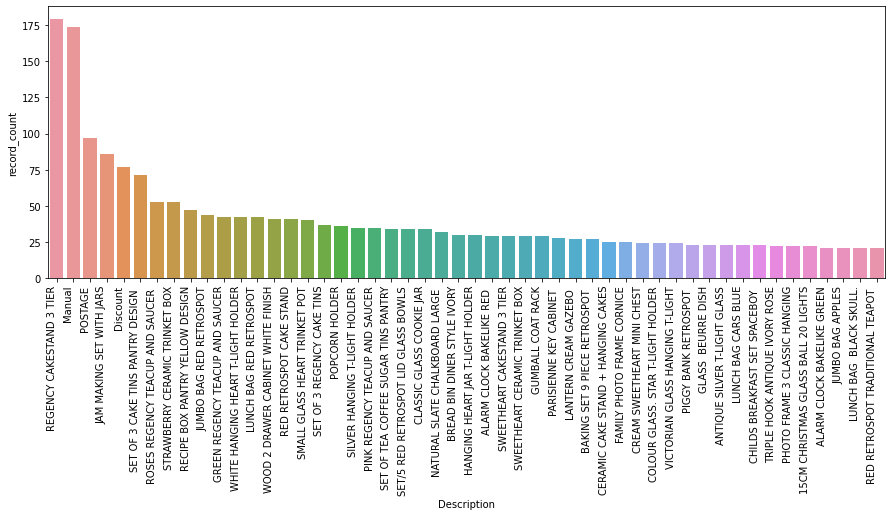

In [37]:
# to 50 highest returned by product
pd.options.display.float_format = '{:,.2f}'.format
fig, axs = plt.subplots(figsize=(15,5))

ax0=sns.barplot(x='Description',y='record_count',data = df_cancelled_1.head(50),
           order=df_cancelled_1.head(50).sort_values('record_count',ascending = False).Description)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [38]:
# highest returned by Customer
df_cancelled_2= df_cancelled.groupby(['CustomerID'])[['record_count']].sum().reset_index().sort_values(by=['record_count'], ascending=False)
df_cancelled_2.head(10)

,CustomerID,record_count
735,14911.0,226
1483,17841.0,136
1395,17511.0,113
847,15311.0,112
88,12607.0,101
604,14410.0,91
416,13798.0,88
651,14606.0,82
245,13113.0,79
35,12471.0,71


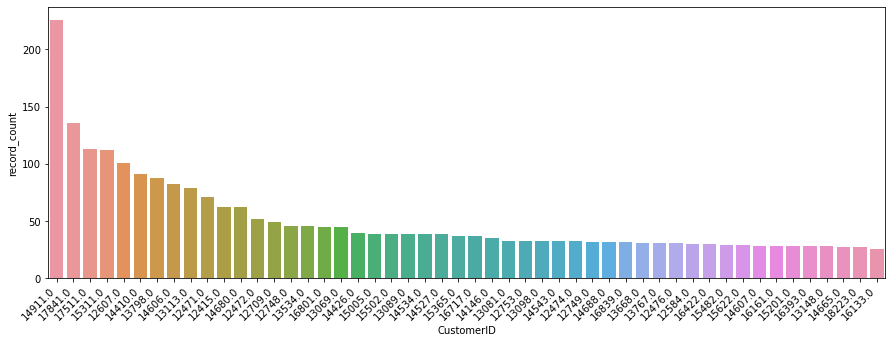

In [39]:
# Top 50 highest returned by Customer
#pd.options.display.float_format = '{:,.2f}'.format
fig, axs = plt.subplots(figsize=(15,5))

ax0=sns.barplot(x='CustomerID',y='record_count',data = df_cancelled_2.head(50),
           order=df_cancelled_2.head(50).sort_values('record_count',ascending = False).CustomerID)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [40]:
df_cancelled[df_cancelled['CustomerID']=='14911.0']['Country'].unique()

array(['EIRE'], dtype=object)

In [41]:
# highest returned by Country
df_cancelled_3= df_cancelled.groupby(['Country'])[['record_count']].sum().reset_index().sort_values(by=['record_count'], ascending=False)
df_cancelled_3.head(10)

,Country,record_count
27,United Kingdom,7471
11,Germany,453
7,EIRE,247
10,France,147
26,USA,112
0,Australia,74
23,Spain,48
14,Italy,45
2,Belgium,38
15,Japan,37


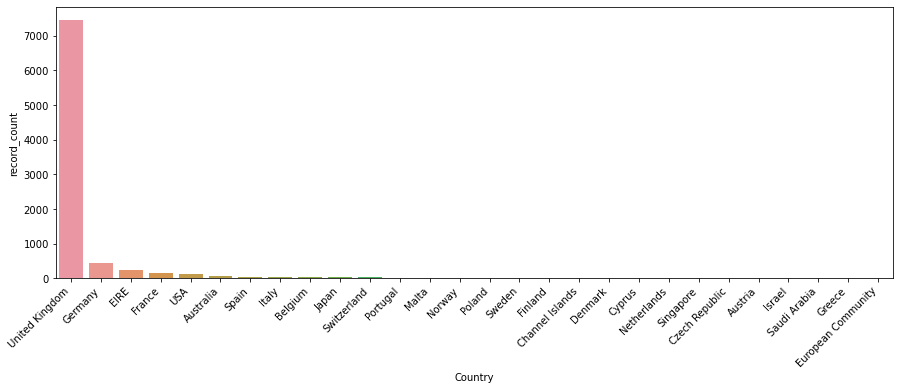

In [42]:
# highest returned by Country
pd.options.display.float_format = '{:,.2f}'.format
fig, axs = plt.subplots(figsize=(15,5))

ax0=sns.barplot(x='Country',y='record_count',data = df_cancelled_3,
           order=df_cancelled_3.sort_values('record_count',ascending = False).Country)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [43]:
# highest returned by Year
df_cancelled_4= df_cancelled.groupby(['Year'])[['record_count']].sum().reset_index().sort_values(by=['record_count'], ascending=False)
df_cancelled_4.head(10)

,Year,record_count
1,2011,8166
0,2010,675


    Year  Month  record_count
0   2010     12           675
1   2011      1           677
2   2011      2           429
3   2011      3           643
4   2011      4           552
5   2011      5           586
6   2011      6           648
7   2011      7           673
8   2011      8           647
9   2011      9           784
10  2011     10          1126
11  2011     11          1047
12  2011     12           354


<Figure size 1080x720 with 0 Axes>

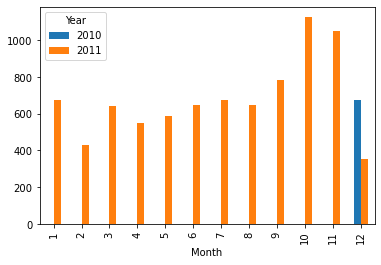

In [44]:
df_cancelled_year = df_cancelled.groupby(['Year','Month'])[['record_count']].sum().reset_index().sort_values(by=['Year'])
print(df_cancelled_year)
plt.figure(figsize=(15,10))
pd.crosstab(df_cancelled['Month'],df_cancelled['Year']).plot.bar()
plt.show()

In [45]:
# Total sales lost due to cancellation
df_cancelled['Total_Sales'].sum()

-321446.05

# Observation 7: 
    
* After removing the observed outliers and  analysing the returned products, we see that
    * REGENCY CAKE STAND 3 TIER is the top most product item that was returned
    * Looks like ther are some prducts where were cancelled manually and tagged as 'Manual' in the product list and those are the 2nd most returned/cancelled products
    * Postage appears to be the 3rd most product that were cancelled.
    
* Looking at the cancellation by CustomerID, we see that most cancellation by Customer is done by CustomerID = 14911 from country EIRE, However, United kingdom appears to be the Country with most cancellation overall.This tellas us that although there is one Customer who cancelled the most product item but overall, we understand that most cancellation are coming from united kingdom.

* We also see that the cancellation rate ss almost the same across all months except for October and November where we see an upward trend. 

* After removing the records witout any Customer id, outiers, etc, we see the Total Sales lost due to cancellation is around 3,21,446

### Dropping all the cancelled/ returned transaction to analyse the sales

In [46]:
print(df_new_date_formatted.shape)
print(df_cancelled.shape)
print(df_new_date_formatted.shape[0]-df_cancelled.shape[0])

(396762, 13)
(8841, 13)
387921


In [47]:
df_new_date_formatted.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12-01,1,22.00


# Analysing Sales

In [48]:
df_sales=df_new_date_formatted[~df_new_date_formatted['InvoiceNo'].str.startswith('C',na=False)]
print(df_sales.shape)

(387921, 13)


In [49]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34


In [50]:
df_sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,"387,921.00",12.88,47.71,1.00,2.00,6.00,12.00,"12,540.00"
UnitPrice,"387,921.00",3.13,22.38,0.00,1.25,1.95,3.75,"8,142.75"
Year,"387,921.00","2,010.93",0.25,"2,010.00","2,011.00","2,011.00","2,011.00","2,011.00"
Month,"387,921.00",7.59,3.41,1.00,5.00,8.00,11.00,12.00
record_count,"387,921.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
Total_Sales,"387,921.00",22.22,97.34,0.00,4.95,12.50,19.80,"38,970.00"


# Observation 8:

* we see that for Quantity the max value = 12540, this appears to be an outlier again but we can check how many entries of such high value is there in the transaction.If it is just one off, then we could potentially drop this transaction

In [51]:
df_sales[df_sales['Quantity']==12540]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011,11,2011-11-25,1,0.00


In [52]:
#### It looks like there is only one transaction with such a high value of quantity and 
#    we also see that the Unit price for the same is 0, hence we can drop this transaction forom the datset

df_sales.drop(502122, axis =0, inplace = True)
df_sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,"387,920.00",12.85,43.27,1.00,2.00,6.00,12.00,"4,800.00"
UnitPrice,"387,920.00",3.13,22.38,0.00,1.25,1.95,3.75,"8,142.75"
Year,"387,920.00","2,010.93",0.25,"2,010.00","2,011.00","2,011.00","2,011.00","2,011.00"
Month,"387,920.00",7.59,3.41,1.00,5.00,8.00,11.00,12.00
record_count,"387,920.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
Total_Sales,"387,920.00",22.22,97.34,0.00,4.95,12.50,19.80,"38,970.00"


### Checking how many trsansaction with Unit Price = 0

In [53]:
print(df_sales[df_sales['UnitPrice']==0].shape)
df_sales[df_sales['UnitPrice']==0]

(39, 13)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.00,12647.0,Germany,2010,12,2010-12-05,1,0.00
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00,16560.0,United Kingdom,2010,12,2010-12-16,1,0.00
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.00,14911.0,EIRE,2010,12,2010-12-21,1,0.00
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom,2011,1,2011-01-06,1,0.00
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom,2011,1,2011-01-06,1,0.00
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.00,15107.0,United Kingdom,2011,1,2011-01-13,1,0.00
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.00,17560.0,United Kingdom,2011,2,2011-02-10,1,0.00
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.00,13239.0,United Kingdom,2011,3,2011-03-23,1,0.00
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.00,13113.0,United Kingdom,2011,3,2011-03-30,1,0.00
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.00,14410.0,United Kingdom,2011,4,2011-04-04,1,0.00


# Observation 9:
* Ther are 39 Transaction, with the unit price = 0, we can  potentially drop these transaction or replace the zero values with the mean of each product item

* I am going with dropping all these transaction for simplicity, since there are only 39 transactions where the Unit price is = 0

In [54]:
#df_new_2['UnitPrice'] = df_new_2['UnitPrice'].replace(0, np.nan)
#df_new_2['UnitPrice']=df_new_2['UnitPrice'].fillna(df.groupby('Description')['UnitPrice'].transform('mean'))

In [55]:
df_sales.shape[0]-df_sales[df_sales['UnitPrice']==0].shape[0]

387881

In [56]:
df_sales_new = df_sales[df_sales['UnitPrice']!=0]
print(df_sales_new.shape)
df_sales_new.describe().transpose()

(387881, 13)


,count,mean,std,min,25%,50%,75%,max
Quantity,"387,881.00",12.84,43.27,1.00,2.00,6.00,12.00,"4,800.00"
UnitPrice,"387,881.00",3.13,22.38,0.00,1.25,1.95,3.75,"8,142.75"
Year,"387,881.00","2,010.93",0.25,"2,010.00","2,011.00","2,011.00","2,011.00","2,011.00"
Month,"387,881.00",7.59,3.41,1.00,5.00,8.00,11.00,12.00
record_count,"387,881.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
Total_Sales,"387,881.00",22.22,97.34,0.00,4.95,12.50,19.80,"38,970.00"


In [57]:
df_sales[df_sales['UnitPrice']<=0.03].shape

(43, 13)

In [58]:
df_sales[df_sales['UnitPrice']<=0.03]['Total_Sales'].sum()

0.004

In [59]:
df_sales.shape[0]-df_sales[df_sales['UnitPrice']<=0.03].shape[0]

387877

# Observation 10:

* There are again 49 Transaction, with the unit price <= 0.03, we can potentially drop these transaction 
* Checking the total sales values from these transaction, we see total sales value amounting to just 0.004, which is technically zero values
* I am going with dropping all these transaction for simplicity

In [60]:
df_sales_new_1 = df_sales[df_sales['UnitPrice']>0.03]
print(df_sales_new_1.shape)
df_sales_new_1.describe().transpose()

(387877, 13)


,count,mean,std,min,25%,50%,75%,max
Quantity,"387,877.00",12.84,43.27,1.00,2.00,6.00,12.00,"4,800.00"
UnitPrice,"387,877.00",3.13,22.38,0.04,1.25,1.95,3.75,"8,142.75"
Year,"387,877.00","2,010.93",0.25,"2,010.00","2,011.00","2,011.00","2,011.00","2,011.00"
Month,"387,877.00",7.59,3.41,1.00,5.00,8.00,11.00,12.00
record_count,"387,877.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
Total_Sales,"387,877.00",22.22,97.35,0.06,4.95,12.50,19.80,"38,970.00"


In [61]:
# Tota sales
print('Total sales from all transactions: ',df_sales_new_1['Total_Sales'].sum())

Total sales from all transactions:  8619113.85


In [62]:
df_sales_new_1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34


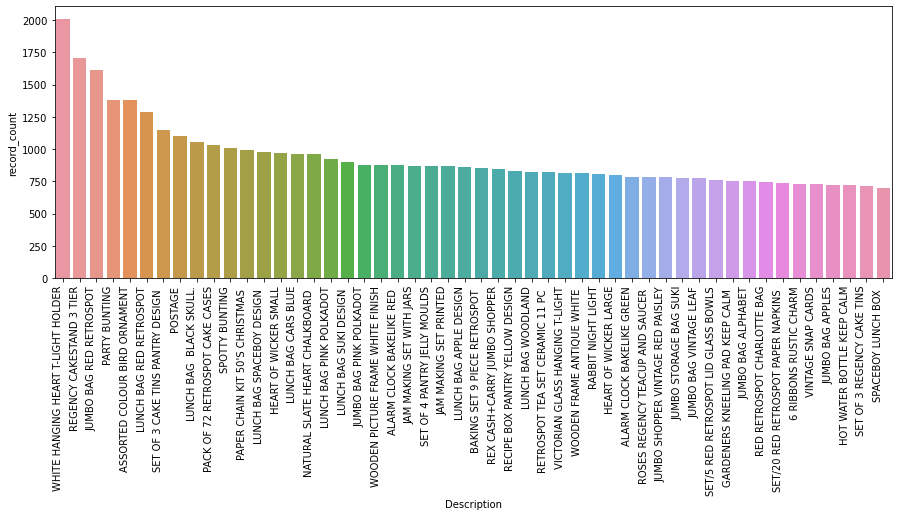

In [63]:
# most selling product item by count
df_sales_1= df_sales_new_1.groupby(['Description'])[['record_count']].sum().reset_index().sort_values(by=['record_count'], ascending=False)

# to 50 highest selling product items by count
pd.options.display.float_format = '{:,.2f}'.format
fig, axs = plt.subplots(figsize=(15,5))

ax0=sns.barplot(x='Description',y='record_count',data = df_sales_1.head(50),
           order=df_sales_1.head(50).sort_values('record_count',ascending = False).Description)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")
plt.show()

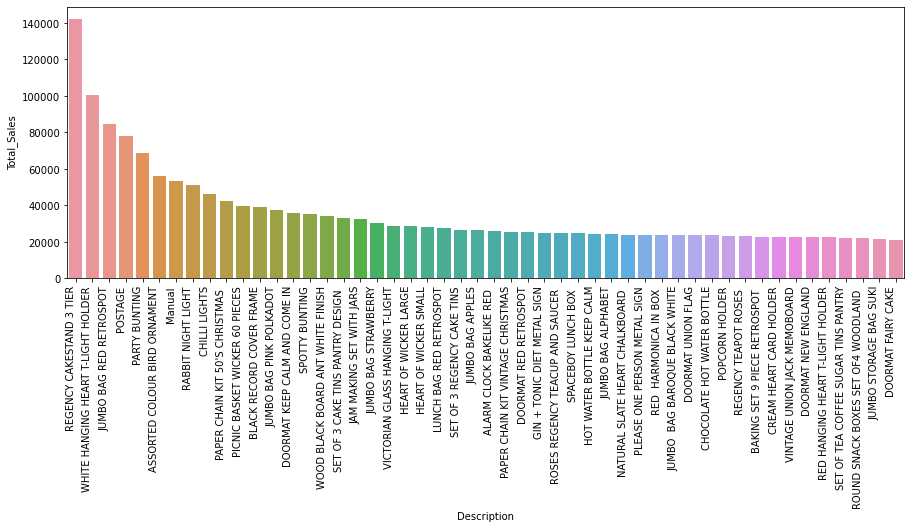

In [64]:
# most selling product item by sales
df_sales_2= df_sales_new_1.groupby(['Description'])[['Total_Sales']].sum().reset_index().sort_values(by=['Total_Sales'], ascending=False)

# to 50 highest selling product items by sales
pd.options.display.float_format = '{:,.2f}'.format
fig, axs = plt.subplots(figsize=(15,5))

ax0=sns.barplot(x='Description',y='Total_Sales',data = df_sales_2.head(50),
           order=df_sales_2.head(50).sort_values('Total_Sales',ascending = False).Description)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [65]:
print('Mean unit price of WHITE HANGING HEART T-LIGHT HOLDER: ',df_sales_new_1[df_sales_new_1['Description']=='WHITE HANGING HEART T-LIGHT HOLDER']['UnitPrice'].mean())
print('Mean unit price of REGENCY CAKESTAND 3 TIER: ',df_sales_new_1[df_sales_new_1['Description']=='REGENCY CAKESTAND 3 TIER']['UnitPrice'].mean())

Mean unit price of WHITE HANGING HEART T-LIGHT HOLDER:  2.8924538653365883
Mean unit price of REGENCY CAKESTAND 3 TIER:  12.482384028185612


# Observation 11:

* WHITE HANGING HEART T-LIGHT HOLDER is the most selling product items by count but REGENCY CAKESTAND 3 TIER brought in the highest sales value
* This is understable becasue the average Unit Price of REGENCY CAKESTAND 3 TIER is much higher than the WHITE HANGING HEART T-LIGHT HOLDER

In [66]:
# least selling product item by count
df_sales_3= df_sales_new_1.groupby(['Description'])[['record_count']].sum().reset_index().sort_values(by=['record_count'], ascending=True)

In [67]:
# product items sold only once
print(df_sales_3[df_sales_3['record_count']==1].shape)
print(df_sales_3[df_sales_3['record_count']==1]['Description'].values)

(215, 2)
['PURPLE GLASS TASSLE BAG CHARM' 'DIAMANTE NECKLACE'
 'SILVER/CRYSTAL DROP EARRINGS W LEAF' 'TINY CRYSTAL BRACELET GREEN'
 'CURIOUS IMAGES SCRAP BOOK SET' 'MIDNIGHT BLUE CRYSTAL DROP EARRINGS'
 'DIAMANTE HAIR GRIP PACK/2 PERIDOT' 'CHRISTMAS TABLE CANDLE SILVER SPIKE'
 'ANT SILVER TURQUOISE BOUDICCA RING' 'FRYING PAN RED POLKADOT '
 'DROP DIAMANTE EARRINGS GREEN' 'DIAMANTE HAIR GRIP PACK/2 CRYSTAL'
 'SET 36 COLOURING PENCILS DOILEY' 'HEAVENS SCENT FRAGRANCE OILS ASSTD'
 'FUNKY MONKEY MUG' 'HAPPY BIRTHDAY CARD TEDDY/CAKE'
 'BLOSSOM IMAGES SCRAP BOOK SET' 'PURPLE CHUNKY GLASS+BEAD NECKLACE'
 'PAINTED HEART WREATH WITH BELL' 'BLACKCHRISTMAS TREE 30CM'
 'BLACK VINT ART DEC CRYSTAL BRACELET' 'ANTIQUE RASPBERRY FLOWER EARRINGS'
 "POTTING SHED SOW 'N' GROW SET" 'MISELTOE HEART WREATH CREAM'
 'PACK 4 FLOWER/BUTTERFLY PATCHES' 'GARLAND, MAGIC GARDEN 1.8M'
 'DROP EARRINGS W FLOWER & LEAF' 'MINT DINER CLOCK'
 'SET 12 COLOURING PENCILS DOILEY' 'BLUE FELT HANGING HEART WITH FLOWER'
 'RUBY G

In [68]:
# product items sold <10 times
print(df_sales_3[df_sales_3['record_count']<10].shape)
print(df_sales_3[df_sales_3['record_count']<=10]['Description'].values)

(941, 2)
['PURPLE GLASS TASSLE BAG CHARM' 'DIAMANTE NECKLACE'
 'SILVER/CRYSTAL DROP EARRINGS W LEAF' 'TINY CRYSTAL BRACELET GREEN'
 'CURIOUS IMAGES SCRAP BOOK SET' 'MIDNIGHT BLUE CRYSTAL DROP EARRINGS'
 'DIAMANTE HAIR GRIP PACK/2 PERIDOT' 'CHRISTMAS TABLE CANDLE SILVER SPIKE'
 'ANT SILVER TURQUOISE BOUDICCA RING' 'FRYING PAN RED POLKADOT '
 'DROP DIAMANTE EARRINGS GREEN' 'DIAMANTE HAIR GRIP PACK/2 CRYSTAL'
 'SET 36 COLOURING PENCILS DOILEY' 'HEAVENS SCENT FRAGRANCE OILS ASSTD'
 'FUNKY MONKEY MUG' 'HAPPY BIRTHDAY CARD TEDDY/CAKE'
 'BLOSSOM IMAGES SCRAP BOOK SET' 'PURPLE CHUNKY GLASS+BEAD NECKLACE'
 'PAINTED HEART WREATH WITH BELL' 'BLACKCHRISTMAS TREE 30CM'
 'BLACK VINT ART DEC CRYSTAL BRACELET' 'ANTIQUE RASPBERRY FLOWER EARRINGS'
 "POTTING SHED SOW 'N' GROW SET" 'MISELTOE HEART WREATH CREAM'
 'PACK 4 FLOWER/BUTTERFLY PATCHES' 'GARLAND, MAGIC GARDEN 1.8M'
 'DROP EARRINGS W FLOWER & LEAF' 'MINT DINER CLOCK'
 'SET 12 COLOURING PENCILS DOILEY' 'BLUE FELT HANGING HEART WITH FLOWER'
 'RUBY G

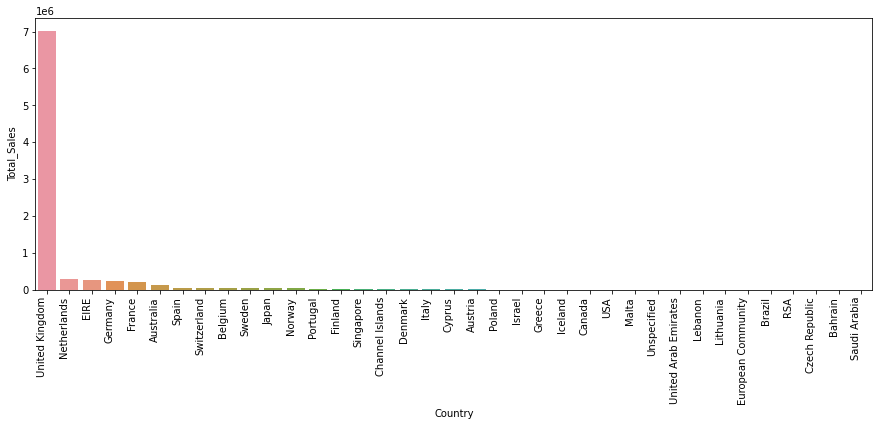

In [69]:
# top buyers product item by Country
df_sales_4= df_sales_new_1.groupby(['Country'])[['Total_Sales']].sum().reset_index().sort_values(by=['Total_Sales'], ascending=False)

# to 50 highest selling product items by sales
pd.options.display.float_format = '{:,.2f}'.format
fig, axs = plt.subplots(figsize=(15,5))

ax0=sns.barplot(x='Country',y='Total_Sales',data = df_sales_4.head(50),
           order=df_sales_4.head(50).sort_values('Total_Sales',ascending = False).Country)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")
plt.show()

# Observation 12:

* United Kingdom is the Country with highest buyers and Saudi Arabia being the least 

    Year  Month  record_count
0   2010     12         25228
1   2011      1         20765
2   2011      2         19494
3   2011      3         26590
4   2011      4         22237
5   2011      5         27838
6   2011      6         26710
7   2011      7         26341
8   2011      8         26580
9   2011      9         39331
10  2011     10         48096
11  2011     11         61900
12  2011     12         16767


<Figure size 1080x720 with 0 Axes>

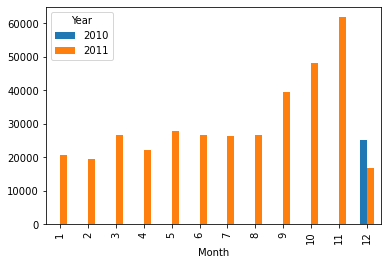

In [70]:
df_sales_year = df_sales_new_1.groupby(['Year','Month'])[['record_count']].sum().reset_index().sort_values(by=['Year'])
print(df_sales_year)
plt.figure(figsize=(15,10))
pd.crosstab(df_sales_new_1['Month'],df_sales_new_1['Year']).plot.bar()
plt.show()

    Year  Month  record_count
0   2010     12         25228
1   2011      1         20765
2   2011      2         19494
3   2011      3         26590
4   2011      4         22237
5   2011      5         27838
6   2011      6         26710
7   2011      7         26341
8   2011      8         26580
9   2011      9         39331
10  2011     10         48096
11  2011     11         61900
12  2011     12         16767


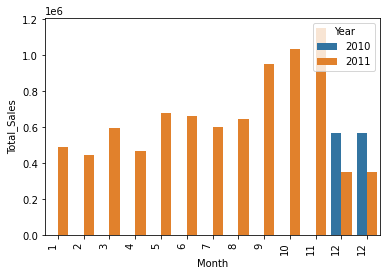

In [71]:
df_sales_year_1 = df_sales_new_1.groupby(['Year','Month'])[['Total_Sales']].sum().reset_index().sort_values(by=['Year'])
print(df_sales_year)

ax0=sns.barplot(x='Month',y='Total_Sales',data = df_sales_year_1.head(50),hue='Year',
           order=df_sales_year_1.head(50).sort_values('Month',ascending = True).Month)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")
plt.show()

# Observation 13:

* Most sells happened in the month of sep, oct and Nov and this also explains why more cancellation happened in Oct and Nov 

In [72]:
df_sales_new_1.shape

(387877, 13)

In [73]:
order_count_by_customer = df_sales_new_1.groupby(['CustomerID'])[['InvoiceNo']].nunique().reset_index()
order_count_by_customer.sort_values(by='InvoiceNo')

,CustomerID,InvoiceNo
2168,15300.0,1
3277,16812.0,1
1518,14420.0,1
3283,16820.0,1
3284,16823.0,1
...,...,...
1660,14606.0,93
561,13089.0,97
4009,17841.0,124
1878,14911.0,201


In [74]:
#unique numbers of Customer and unique numbers of Customer who bought more than once
print('unique numbers of Customer: ',df_sales_new_1['CustomerID'].nunique())
print('unique numbers of Customer who bought more than once:',order_count_by_customer[order_count_by_customer['InvoiceNo']>1]['CustomerID'].nunique())

unique numbers of Customer:  4337
unique numbers of Customer who bought more than once: 2844


In [75]:
customer_bought_more_than_once =order_count_by_customer[order_count_by_customer['InvoiceNo']>1]['CustomerID'].nunique()/df_sales_new_1['CustomerID'].nunique()
customer_bought_more_than_once
print(f'{100 * customer_bought_more_than_once:.2f}% of customers ordered more than once')

65.58% of customers ordered more than once


# Observation 14:
* 65.56% of customers have ordered from the website atleast more than once. It looks like there is a good retention rate

In [76]:
#******************************************#

In [77]:
# code to replace 0 values with the groupby mean
#df_new_2['UnitPrice'] = df_new_2['UnitPrice'].replace(0, np.nan)
#df_new_2['UnitPrice']=df_new_2['UnitPrice'].fillna(df.groupby('Description')['UnitPrice'].transform('mean'))

# Data Transformation:

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.

In [78]:
# Cohort Analysis:

In [79]:
df_sales_new_1.shape

(387877, 13)

In [80]:
df_sales_new_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34


In [81]:
# creating new col InvoiceMonth after stripping the time from the Invoicedate
import datetime as dt
def get_invoice_month(x):
    return dt.datetime(x.year,x.month,1)

In [82]:
df_sales_new_1['Invoice_Month'] = df_sales_new_1['InvoiceDate'].apply(get_invoice_month)
df_sales_new_1['Invoice_Month']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: Invoice_Month, Length: 387877, dtype: datetime64[ns]

In [83]:
df_sales_new_1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales,Invoice_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34,2010-12-01


In [84]:
df_sales_new_1['Cohort_Month'] = df_sales_new_1.groupby('CustomerID')['Invoice_Month'].transform('min')
df_sales_new_1['Cohort_Month']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: Cohort_Month, Length: 387877, dtype: datetime64[ns]

In [85]:
df_sales_new_1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales,Invoice_Month,Cohort_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34,2010-12-01,2010-12-01


In [86]:
def get_year_month_day(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [87]:
invoice_year, invoice_month, invoice_day = get_year_month_day(df_sales_new_1,'Invoice_Month')

In [88]:
cohort_year, cohort_month, cohort_day = get_year_month_day(df_sales_new_1,'Cohort_Month')

In [89]:
year_diff = invoice_year - cohort_year

In [90]:
month_diff = invoice_month - cohort_month

In [91]:
df_sales_new_1['Cohort_index']=year_diff*12 + month_diff+1

In [92]:
df_sales_new_1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales,Invoice_Month,Cohort_Month,Cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12-01,1,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34,2010-12-01,2010-12-01,1


In [93]:
# Now we have created the cohort index, we will be using this cohort index to do the cohort analysis

In [94]:
cohort_df = df_sales_new_1.groupby(['Cohort_Month','Cohort_index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_df

,Cohort_Month,Cohort_index,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,323
89,2011-11-01,2,36


In [95]:
cohort_pivot = cohort_df.pivot_table(index ='Cohort_Month',
                                    columns='Cohort_index',
                                    values='CustomerID')
cohort_pivot

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
2010-12-01,885.00,324.00,286.00,340.00,321.00,352.00,321.00,309.00,313.00,350.00,331.00,445.00,235.00
2011-01-01,416.00,92.00,111.00,96.00,134.00,120.00,103.00,101.00,125.00,136.00,152.00,49.00,NaN
2011-02-01,380.00,71.00,71.00,108.00,103.00,94.00,96.00,106.00,94.00,116.00,26.00,NaN,NaN
2011-03-01,452.00,68.00,114.00,90.00,101.00,76.00,121.00,104.00,126.00,39.00,NaN,NaN,NaN
2011-04-01,300.00,64.00,61.00,63.00,59.00,68.00,65.00,78.00,22.00,NaN,NaN,NaN,NaN
2011-05-01,284.00,54.00,49.00,49.00,59.00,66.00,75.00,26.00,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.00,42.00,38.00,64.00,56.00,81.00,23.00,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.00,34.00,39.00,42.00,51.00,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.00,35.00,42.00,41.00,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Rentention %

cohort_size = cohort_pivot.iloc[:,0]
cohort_size

Cohort_Month
2010-12-01   885.00
2011-01-01   416.00
2011-02-01   380.00
2011-03-01   452.00
2011-04-01   300.00
2011-05-01   284.00
2011-06-01   242.00
2011-07-01   188.00
2011-08-01   169.00
2011-09-01   299.00
2011-10-01   358.00
2011-11-01   323.00
2011-12-01    41.00
Name: 1, dtype: float64

In [97]:
retention = cohort_pivot.divide(cohort_size, axis=0)
retention

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
2010-12-01,1.00,0.37,0.32,0.38,0.36,0.40,0.36,0.35,0.35,0.40,0.37,0.50,0.27
2011-01-01,1.00,0.22,0.27,0.23,0.32,0.29,0.25,0.24,0.30,0.33,0.37,0.12,NaN
2011-02-01,1.00,0.19,0.19,0.28,0.27,0.25,0.25,0.28,0.25,0.31,0.07,NaN,NaN
2011-03-01,1.00,0.15,0.25,0.20,0.22,0.17,0.27,0.23,0.28,0.09,NaN,NaN,NaN
2011-04-01,1.00,0.21,0.20,0.21,0.20,0.23,0.22,0.26,0.07,NaN,NaN,NaN,NaN
2011-05-01,1.00,0.19,0.17,0.17,0.21,0.23,0.26,0.09,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.00,0.17,0.16,0.26,0.23,0.33,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.00,0.18,0.21,0.22,0.27,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.00,0.21,0.25,0.24,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


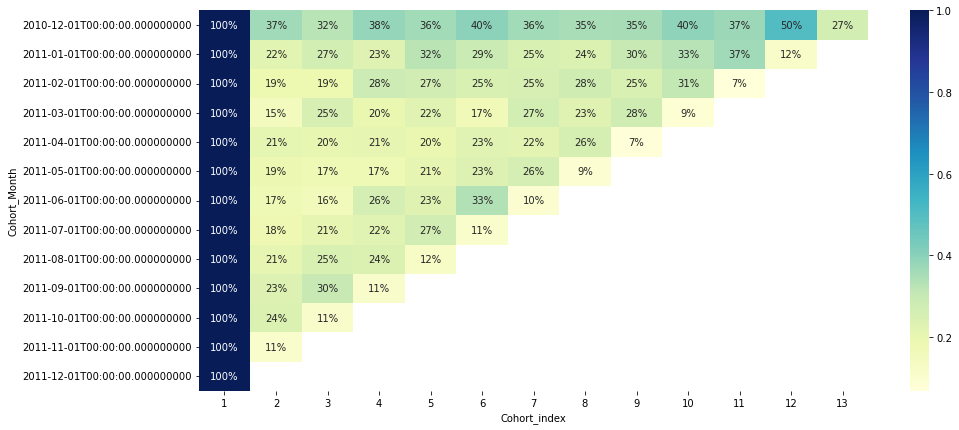

In [98]:
plt.figure(figsize=(15,7))
sns.heatmap(retention, annot=True,cmap='YlGnBu', fmt='.0%')
plt.show()

# Observation 15:
* We do see that 37% of the customers made it to month 2 with us after thier first purchase and over period in time we see that average customer retention is somewhat maintained at an average of 37%.
* However 12 months into relationship with the retailer, we still have 27% of the customers purchasing still.

* For the first cohot 2010-12, for month 11, we do see 50% customer retention, and it appeasr to be as an exception.

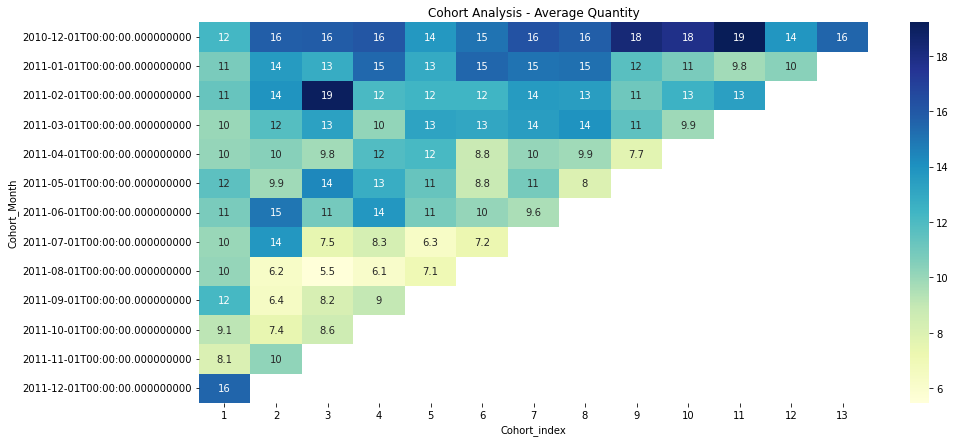

In [99]:
# Average Quantity Sold cohort:
cohort_df_2 = df_sales_new_1.groupby(['Cohort_Month','Cohort_index'])['Quantity'].mean().reset_index()
cohort_pivot_2 = cohort_df_2.pivot_table(index ='Cohort_Month',
                                    columns='Cohort_index',
                                    values='Quantity')
cohort_pivot_2
plt.figure(figsize=(15,7))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(cohort_pivot_2, annot=True,cmap='YlGnBu')
plt.show()

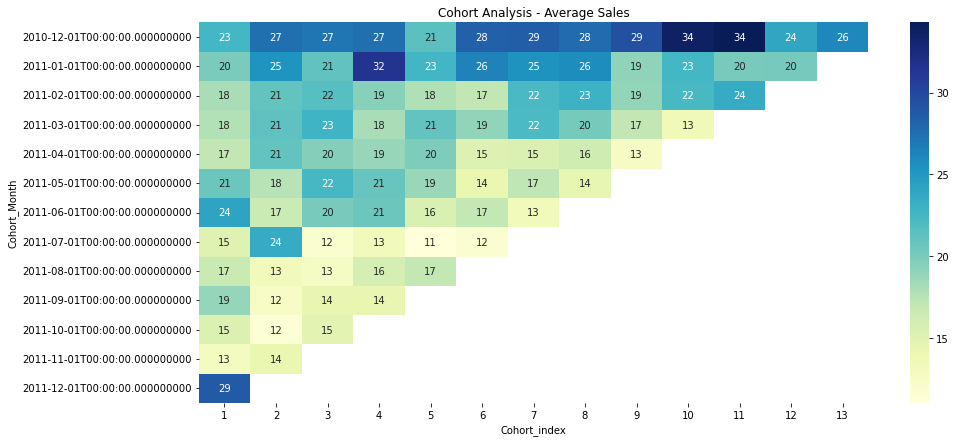

In [100]:
# Average sales cohort

cohort_df_3 = df_sales_new_1.groupby(['Cohort_Month','Cohort_index'])['Total_Sales'].mean().reset_index()
cohort_pivot_3 = cohort_df_3.pivot_table(index ='Cohort_Month',
                                    columns='Cohort_index',
                                    values='Total_Sales')
cohort_pivot_3
plt.figure(figsize=(15,7))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(cohort_pivot_3, annot=True,cmap='YlGnBu')
plt.show()

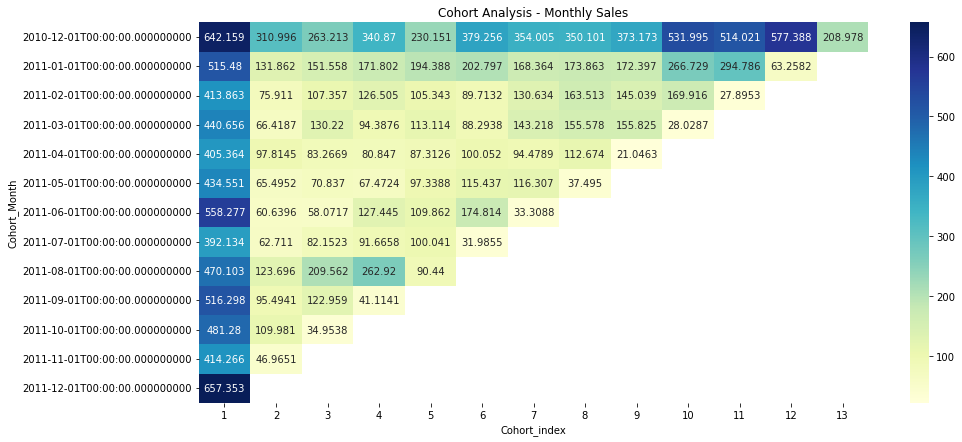

In [101]:
#Total monthly sales cohort
cohort_df_4 = df_sales_new_1.groupby(['Cohort_Month','Cohort_index'])['Total_Sales'].sum().reset_index()
cohort_pivot_4 = cohort_df_4.pivot_table(index ='Cohort_Month',
                                    columns='Cohort_index',
                                    values='Total_Sales')

cohort_pivot_4
sales = cohort_pivot_4.divide(cohort_size, axis=0)
sales

plt.figure(figsize=(15,7))
plt.title('Cohort Analysis - Monthly Sales')
sns.heatmap(sales, annot=True,cmap='YlGnBu',fmt='g')
plt.show()

# # Observation 16:
* We see that in the month of sep, oct and Nov, there is high sales brought in by the same set of customers as compared to other months
* It could be there were some discounts or seasonal sales happend during these months

In [102]:
sales

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
2010-12-01,642.16,311.00,263.21,340.87,230.15,379.26,354.01,350.10,373.17,531.99,514.02,577.39,208.98
2011-01-01,515.48,131.86,151.56,171.80,194.39,202.80,168.36,173.86,172.40,266.73,294.79,63.26,NaN
2011-02-01,413.86,75.91,107.36,126.51,105.34,89.71,130.63,163.51,145.04,169.92,27.90,NaN,NaN
2011-03-01,440.66,66.42,130.22,94.39,113.11,88.29,143.22,155.58,155.83,28.03,NaN,NaN,NaN
2011-04-01,405.36,97.81,83.27,80.85,87.31,100.05,94.48,112.67,21.05,NaN,NaN,NaN,NaN
2011-05-01,434.55,65.50,70.84,67.47,97.34,115.44,116.31,37.49,NaN,NaN,NaN,NaN,NaN
2011-06-01,558.28,60.64,58.07,127.45,109.86,174.81,33.31,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,392.13,62.71,82.15,91.67,100.04,31.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,470.10,123.70,209.56,262.92,90.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
d1=sales.reset_index()
d1

for i in range(1,14):
    if i==1:
        x1=d1[i]
    elif i==2:
        x2 =d1[i] +x1
    elif i==3:
        x3 =d1[i] +x2
    elif i==4:
        x4 =d1[i] +x3
    elif i==5:
        x5 =d1[i] +x4
    elif i==6:
        x6 =d1[i] +x5
    elif i==7:
        x7 =d1[i] +x6
    elif i==8:
        x8 =d1[i] +x7
    elif i==9:
        x9 =d1[i] +x8
    elif i==10:
        x10 =d1[i] +x9
    elif i==11:
        x11 =d1[i] +x10    
    elif i==12:
        x12 =d1[i] +x11
    elif i==13:
        x13 =d1[i] +x12
    else:
        break
        
df_cumulative = pd.concat([d1['Cohort_Month'],
                           x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13],
                          axis = 1)
df_cumulative
df_cumulative.columns=['Cohort_Month',1,2,3,4,5,6,7,8,9,10,11,12,13]
df_cumulative

,Cohort_Month,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-12-01,642.16,953.16,"1,216.37","1,557.24","1,787.39","2,166.64","2,520.65","2,870.75","3,243.92","3,775.92","4,289.94","4,867.33","5,076.31"
1,2011-01-01,515.48,647.34,798.90,970.70,"1,165.09","1,367.89","1,536.25","1,710.11","1,882.51","2,149.24","2,444.03","2,507.28",NaN
2,2011-02-01,413.86,489.77,597.13,723.64,828.98,918.69,"1,049.33","1,212.84","1,357.88","1,527.79","1,555.69",NaN,NaN
3,2011-03-01,440.66,507.07,637.29,731.68,844.80,933.09,"1,076.31","1,231.89","1,387.71","1,415.74",NaN,NaN,NaN
4,2011-04-01,405.36,503.18,586.45,667.29,754.60,854.66,949.14,"1,061.81","1,082.86",NaN,NaN,NaN,NaN
5,2011-05-01,434.55,500.05,570.88,638.36,735.69,851.13,967.44,"1,004.93",NaN,NaN,NaN,NaN,NaN
6,2011-06-01,558.28,618.92,676.99,804.43,914.30,"1,089.11","1,122.42",NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,392.13,454.85,537.00,628.66,728.70,760.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,470.10,593.80,803.36,"1,066.28","1,156.72",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,516.30,611.79,734.75,775.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


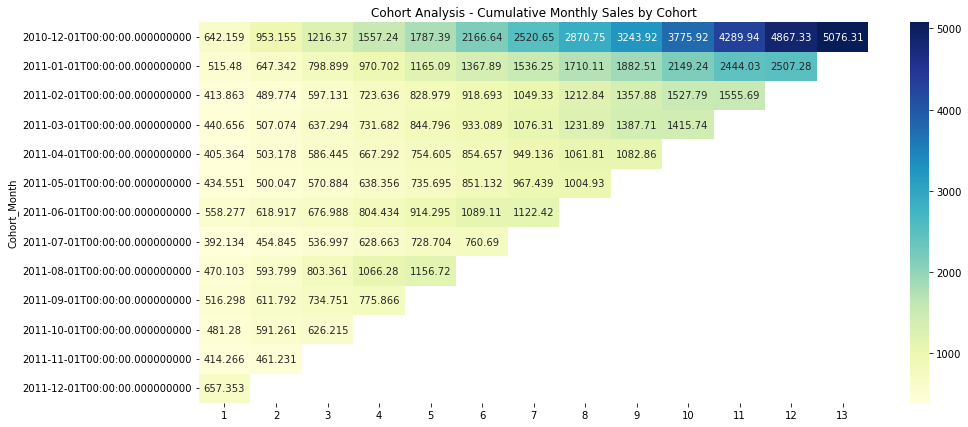

In [104]:
df_cumulative.set_index('Cohort_Month', inplace=True)
plt.figure(figsize=(15,7))
plt.title('Cohort Analysis - Cumulative Monthly Sales by Cohort')
sns.heatmap(df_cumulative, annot=True,cmap='YlGnBu',fmt='g')
plt.show()

# Observation 17:

* out of originally 855 customers, on an average, for each Customer that is accuired, the retailers sold around 5076
* so out of 855 customers, some dropped off and some stuck on and some customers porion of that customers spent a lot more than than 5076 and some portion of the customers spent lot less. However, on average is 5076. This kind of gives an idea that when the retailer accuries a customer in the begining on the month say jan, than over a year long period, the retailer will sell around 5076 on an average.

In [105]:
#**********************************

# 2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [106]:
RFM_df = df_sales_new_1.copy()

In [107]:
RFM_df.to_csv('RFM_df.csv')

In [108]:
# Checking and removing duplicates if any
if RFM_df.duplicated().sum().any()==True:
    print('There are duplicate values in the dataset')
else:
    print('There are no duplicate values in the dataset')

There are no duplicate values in the dataset


In [109]:
RFM_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,date,record_count,Total_Sales,Invoice_Month,Cohort_Month,Cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01,1,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01,1,20.34,2010-12-01,2010-12-01,1


In [110]:
import datetime as dt
#finding the lastest date when the last transaction happened
latest_date = RFM_df['InvoiceDate'].max()
print(latest_date)

2011-12-09 12:50:00


In [111]:
#creating R,F, M score columns
RFM_table = RFM_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date-x.max()).days,
                                             'InvoiceNo': 'count',
                                             'Total_Sales':'sum'})
RFM_table.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'Total_Sales':'Monetary'}, inplace=True)
RFM_table.reset_index(inplace=True)
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,182,"4,310.00"
1,12348.0,74,31,"1,797.24"
2,12349.0,18,73,"1,757.55"
3,12350.0,309,17,334.40
4,12352.0,35,85,"2,506.04"


count   4,337.00
mean       91.53
std        99.97
min         0.00
25%        17.00
50%        50.00
75%       141.00
max       373.00
Name: Recency, dtype: float64


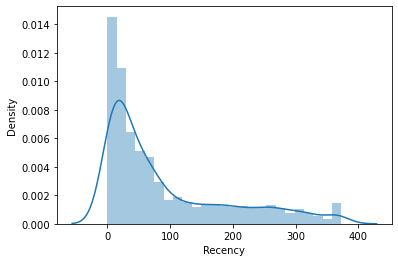

In [112]:
#Descriptive Statistics(Recency)
print(RFM_table.Recency.describe())
sns.distplot(RFM_table.Recency)
plt.show()

count   4,337.00
mean       89.43
std       222.59
min         1.00
25%        17.00
50%        40.00
75%        97.00
max     7,523.00
Name: Frequency, dtype: float64


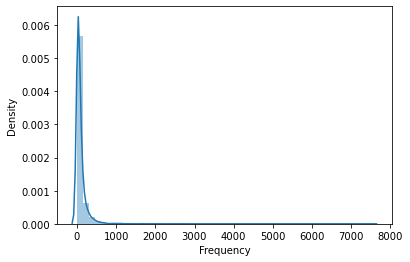

In [113]:
#Descriptive Statistics(Frequency)
print(RFM_table.Frequency.describe())
sns.distplot(RFM_table.Frequency)
plt.show()

count     4,337.00
mean      1,987.34
std       8,543.66
min           2.90
25%         305.10
50%         663.81
75%       1,647.26
max     280,206.02
Name: Monetary, dtype: float64


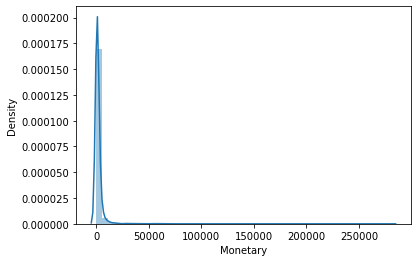

In [114]:
#Descriptive Statistics(Monetary)
print(RFM_table.Monetary.describe())
sns.distplot(RFM_table.Monetary)
plt.show()

# Observation 17:
* The mean of recnecy is 91 but the median value = 50. We see the max value is 373 which pethaps need more analysis.
* The dist plot shows that the data is left skwed.

In [115]:
# Creating R, F, M  quantiles
RFM_quantiles = RFM_table.quantile(q=[0.25,0.50,0.75])
RFM_quantiles=RFM_quantiles.to_dict()
RFM_quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 97.0},
 'Monetary': {0.25: 305.1, 0.5: 663.81, 0.75: 1647.26}}

* creting functions for R score and F&M score where we are assinging values 1,2,3 & 4
    * for Recency: 1 is for the lowest value of recencey, because the lowere the value of recency the better it is as it shows that the customer is more enanged with the retailer
    * for Frequency and Monetary: we are assigning 1 to the highest values of frequency and Monetary, because higher the value of Frequency and monetary the better customer engagement with the retailer

In [116]:
def R_func(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnM_func(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    

In [117]:
RFM_table['R_score'] =RFM_table['Recency'].apply(R_func,args=('Recency',RFM_quantiles,))
RFM_table['F_score'] =RFM_table['Frequency'].apply(R_func,args=('Frequency',RFM_quantiles,))
RFM_table['M_score'] =RFM_table['Monetary'].apply(R_func,args=('Monetary',RFM_quantiles,))
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12347.0,1,182,"4,310.00",1,4,4
1,12348.0,74,31,"1,797.24",3,2,4
2,12349.0,18,73,"1,757.55",2,3,4
3,12350.0,309,17,334.40,4,1,2
4,12352.0,35,85,"2,506.04",2,3,4


In [118]:
#b1. Combine three ratings to get a RFM segment (as strings).
RFM_table['RFM_segment'] = RFM_table['R_score'].map(str)+RFM_table['F_score'].map(str)+RFM_table['M_score'].map(str)

#b2. Get the RFM score by adding up the three ratings.
RFM_table['RFM_Score']=RFM_table[['R_score','F_score','M_score']].sum(axis=1)
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_Score
0,12347.0,1,182,"4,310.00",1,4,4,144,9
1,12348.0,74,31,"1,797.24",3,2,4,324,9
2,12349.0,18,73,"1,757.55",2,3,4,234,9
3,12350.0,309,17,334.40,4,1,2,412,7
4,12352.0,35,85,"2,506.04",2,3,4,234,9


In [119]:
#Assigning customer segmentation as Platinum, Gold, Silver and Bronze
# 1 = Platinum, 2 = Gold, 3 = Silver and 4= Bronze

Cust_Segment = ['Platinum', 'Gold', 'Silver' , 'Bronze']
Score_cuts = pd.qcut(RFM_table.RFM_Score,q=4,labels=Cust_Segment)

RFM_table['Customer_segment']=Score_cuts.values
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_Score,Customer_segment
0,12347.0,1,182,"4,310.00",1,4,4,144,9,Silver
1,12348.0,74,31,"1,797.24",3,2,4,324,9,Silver
2,12349.0,18,73,"1,757.55",2,3,4,234,9,Silver
3,12350.0,309,17,334.40,4,1,2,412,7,Gold
4,12352.0,35,85,"2,506.04",2,3,4,234,9,Silver


In [120]:
RFM_table[RFM_table['RFM_segment']=='111'].sort_values('Monetary',ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_Score,Customer_segment
1563,14480.0,10,13,279.05,1,1,1,111,3,Platinum
2904,16313.0,2,16,274.15,1,1,1,111,3,Platinum
1596,14520.0,1,4,270.60,1,1,1,111,3,Platinum
167,12558.0,7,11,269.96,1,1,1,111,3,Platinum
473,12962.0,6,16,266.39,1,1,1,111,3,Platinum
700,13277.0,15,8,258.40,1,1,1,111,3,Platinum
792,13404.0,0,11,252.49,1,1,1,111,3,Platinum
647,13207.0,14,8,250.26,1,1,1,111,3,Platinum
3112,16596.0,15,12,250.15,1,1,1,111,3,Platinum
754,13349.0,10,16,247.32,1,1,1,111,3,Platinum


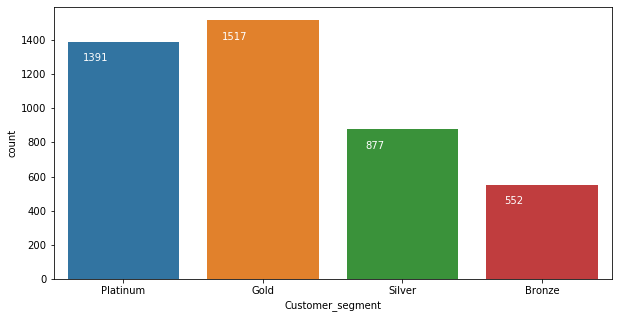

In [121]:
plt.figure(figsize=(10,5))
plt.style.use('_classic_test_patch')
ax=sns.countplot(RFM_table['Customer_segment'])

value_ticks = []
for x in RFM_table['Customer_segment'].value_counts():
    value_ticks.append(str(int(x)))
    
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),
                ha='center', va='top', color='white', size=10)

plt.show()

In [122]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_Score,Customer_segment
0,12347.0,1,182,"4,310.00",1,4,4,144,9,Silver
1,12348.0,74,31,"1,797.24",3,2,4,324,9,Silver
2,12349.0,18,73,"1,757.55",2,3,4,234,9,Silver
3,12350.0,309,17,334.40,4,1,2,412,7,Gold
4,12352.0,35,85,"2,506.04",2,3,4,234,9,Silver


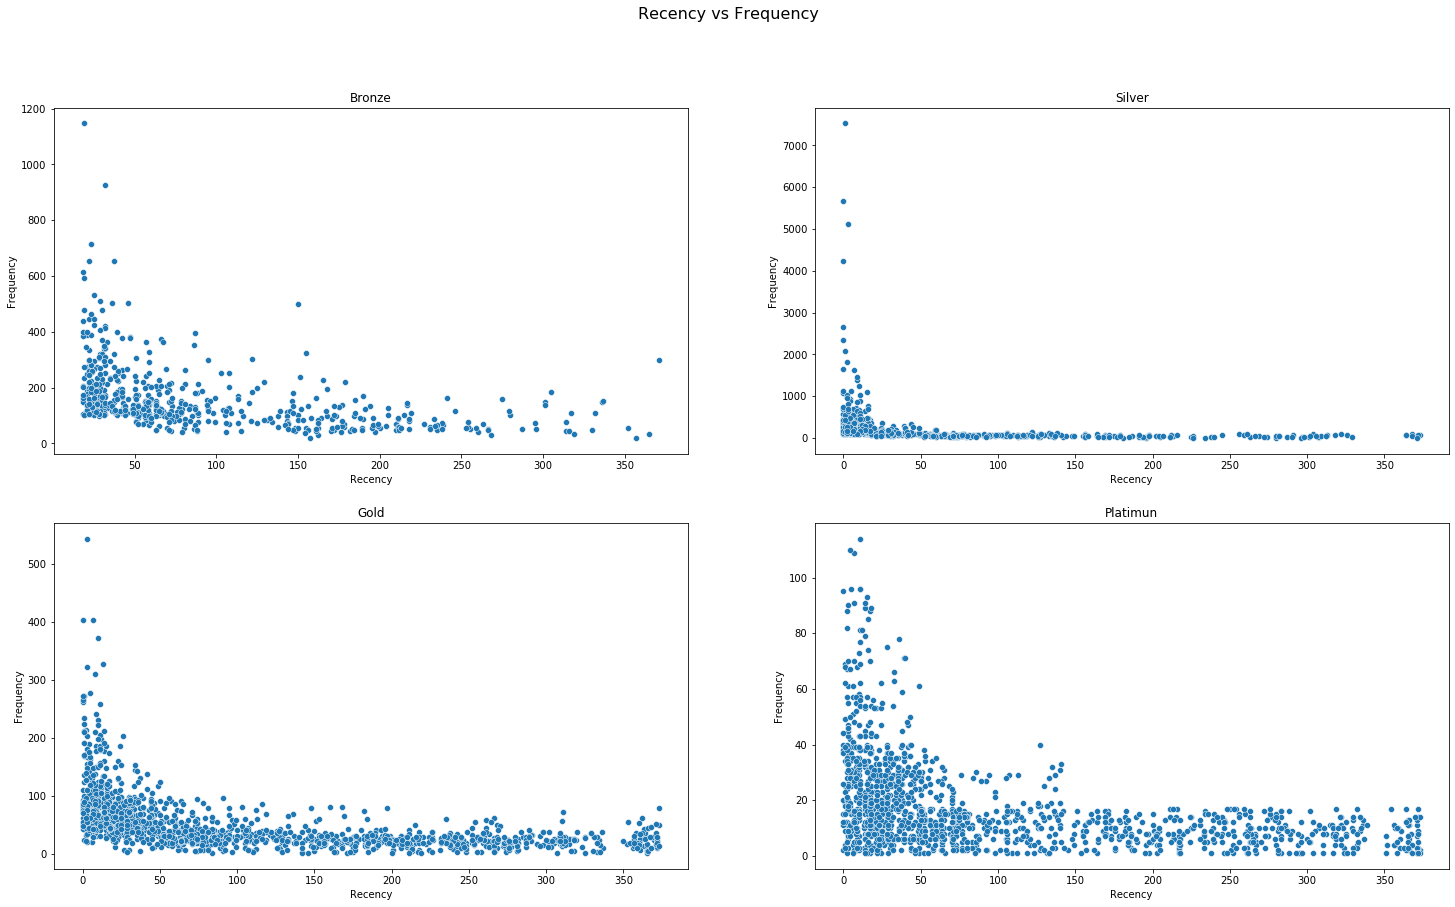

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,14))
fig.suptitle("Recency vs Frequency", fontsize=16)
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Bronze']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Bronze']['Frequency'],ax=axes[0,0])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Silver']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Silver']['Frequency'],ax=axes[0,1])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Gold']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Gold']['Frequency'],ax=axes[1,0])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Platinum']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Platinum']['Frequency'],ax=axes[1,1])
axes[0,0].title.set_text('Bronze')
axes[0,1].title.set_text('Silver')
axes[1,0].title.set_text('Gold')
axes[1,1].title.set_text('Platimun')
plt.show()

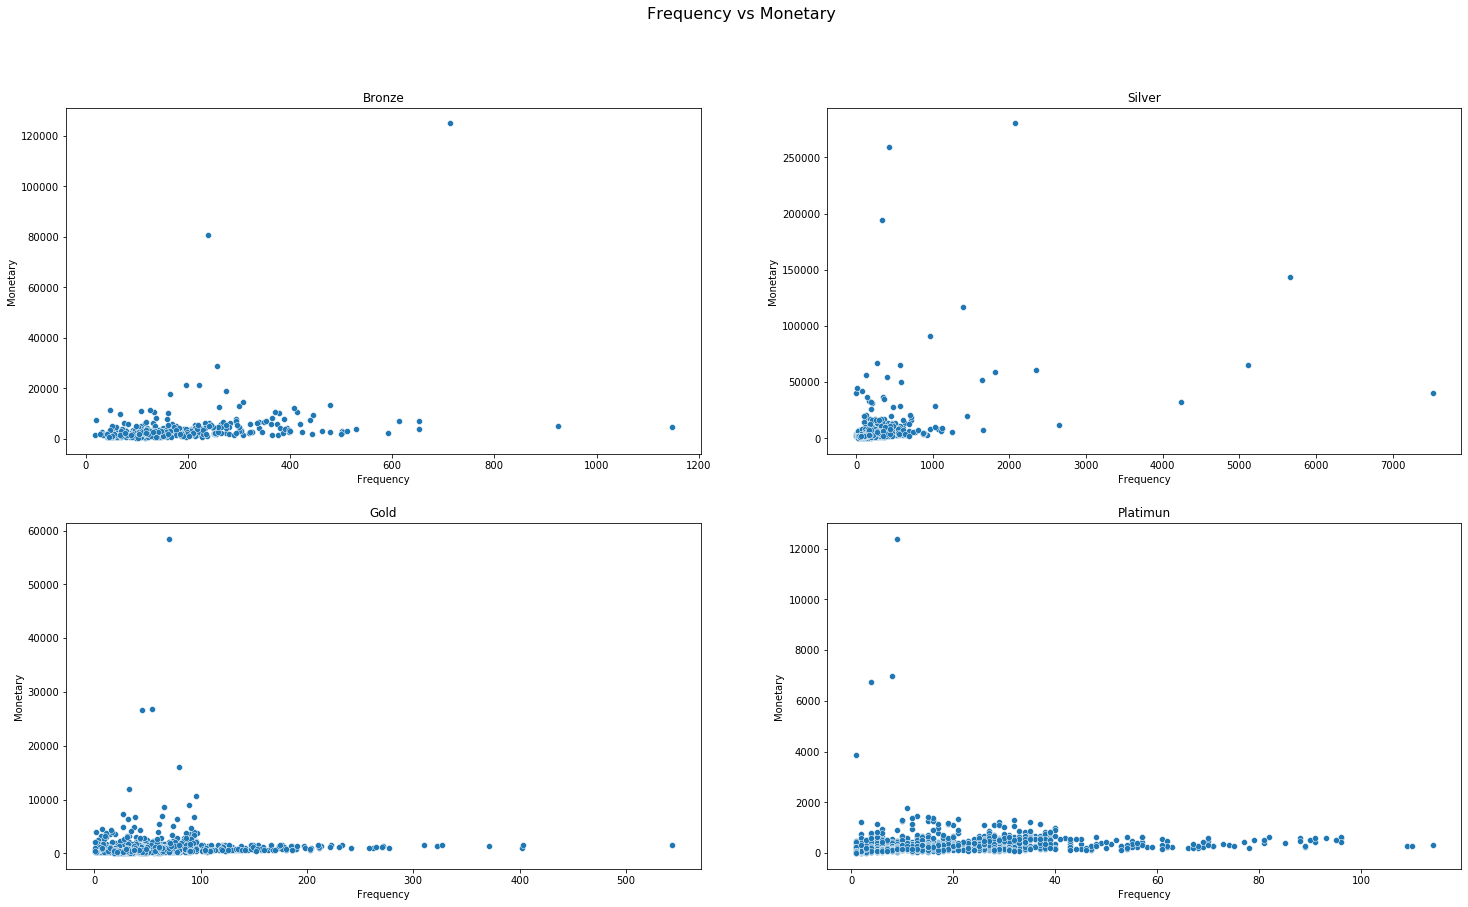

In [124]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,14))
fig.suptitle("Frequency vs Monetary", fontsize=16)
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Bronze']['Frequency'],
                RFM_table[RFM_table['Customer_segment']=='Bronze']['Monetary'],ax=axes[0,0])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Silver']['Frequency'],
                RFM_table[RFM_table['Customer_segment']=='Silver']['Monetary'],ax=axes[0,1])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Gold']['Frequency'],
                RFM_table[RFM_table['Customer_segment']=='Gold']['Monetary'],ax=axes[1,0])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Platinum']['Frequency'],
                RFM_table[RFM_table['Customer_segment']=='Platinum']['Monetary'],ax=axes[1,1])
axes[0,0].title.set_text('Bronze')
axes[0,1].title.set_text('Silver')
axes[1,0].title.set_text('Gold')
axes[1,1].title.set_text('Platimun')
plt.show()

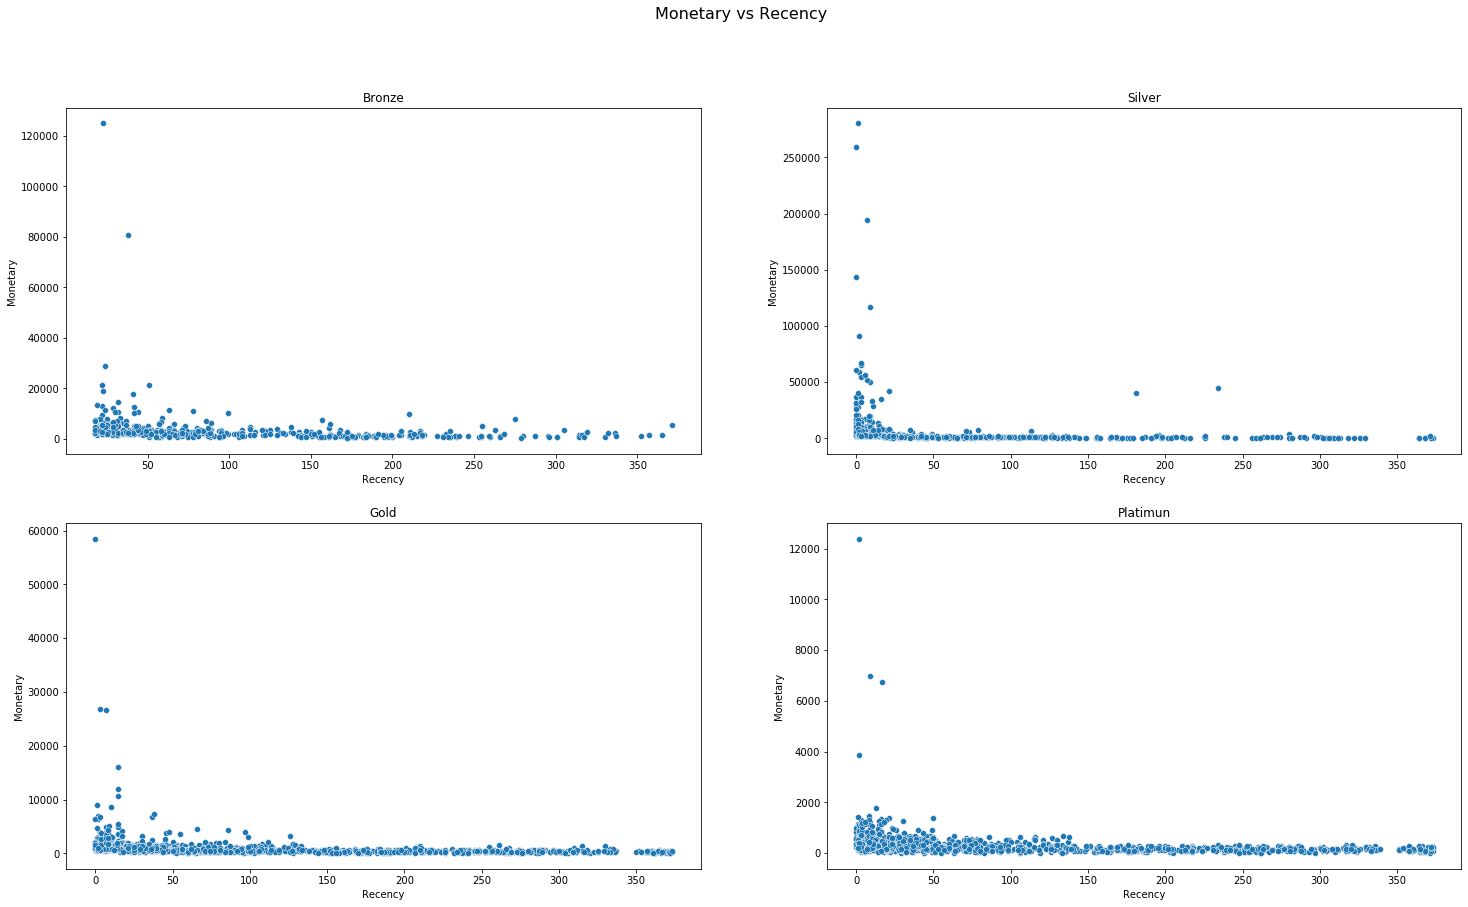

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,14))
fig.suptitle("Monetary vs Recency", fontsize=16)
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Bronze']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Bronze']['Monetary'],ax=axes[0,0])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Silver']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Silver']['Monetary'],ax=axes[0,1])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Gold']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Gold']['Monetary'],ax=axes[1,0])
sns.scatterplot(RFM_table[RFM_table['Customer_segment']=='Platinum']['Recency'],
                RFM_table[RFM_table['Customer_segment']=='Platinum']['Monetary'],ax=axes[1,1])
axes[0,0].title.set_text('Bronze')
axes[0,1].title.set_text('Silver')
axes[1,0].title.set_text('Gold')
axes[1,1].title.set_text('Platimun')
plt.show()

# Observation 18 :

* We do see that from the bra graph that, the retailer has high number of Gold Customers and Platinum customers.



# Project Task: Week 3

Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [126]:
RFM_table.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,"4,337.00","4,337.00","4,337.00","4,337.00","4,337.00","4,337.00","4,337.00"
mean,91.53,89.43,"1,987.34",2.49,2.49,2.50,7.48
std,99.97,222.59,"8,543.66",1.13,1.12,1.12,1.83
min,0.00,1.00,2.90,1.00,1.00,1.00,3.00
25%,17.00,17.00,305.10,1.00,1.00,1.00,6.00
50%,50.00,40.00,663.81,2.00,2.00,2.00,8.00
75%,141.00,97.00,"1,647.26",3.00,3.00,3.00,9.00
max,373.00,"7,523.00","280,206.02",4.00,4.00,4.00,12.00


* As we have seen that our data is majorly left skwed, we will have to perform techniue to transform the data to make it as close to ormal distribution
* We can apply log transformation to make our data normally distributed
* However, before that we need to ensure that we do not have any Zeros or neative data in our datset
* by observing the describe table, we see the min value for recency = 0, we need to handle this, as to handle infinite numbers during log transformation

In [127]:
# a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.


def handle_zero(num):
    if num <=0:
        return 1
    else:
        return num
    
RFM_table['Recency'] = [handle_zero(x) for x in RFM_table.Recency]
RFM_table['Monetary'] =[handle_zero(x) for x in RFM_table.Monetary]


In [128]:
RFM_table.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,"4,337.00","4,337.00","4,337.00","4,337.00","4,337.00","4,337.00","4,337.00"
mean,91.55,89.43,"1,987.34",2.49,2.49,2.50,7.48
std,99.95,222.59,"8,543.66",1.13,1.12,1.12,1.83
min,1.00,1.00,2.90,1.00,1.00,1.00,3.00
25%,17.00,17.00,305.10,1.00,1.00,1.00,6.00
50%,50.00,40.00,663.81,2.00,2.00,2.00,8.00
75%,141.00,97.00,"1,647.26",3.00,3.00,3.00,9.00
max,373.00,"7,523.00","280,206.02",4.00,4.00,4.00,12.00


In [129]:
# performing log transformation to bring the data to normal distribution or near normal distribution
RFM_table_log_transformed =RFM_table[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)

<AxesSubplot:xlabel='Recency', ylabel='Density'>

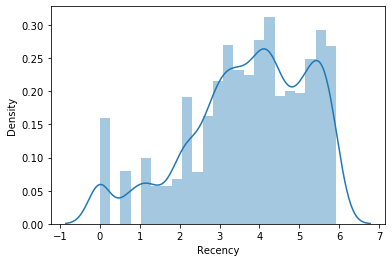

In [130]:
RFM_table_log_transformed
sns.distplot(RFM_table_log_transformed['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

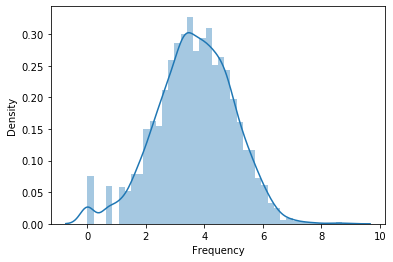

In [131]:
sns.distplot(RFM_table_log_transformed['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

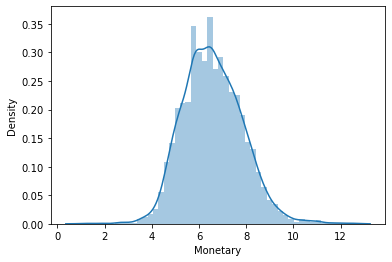

In [132]:
sns.distplot(RFM_table_log_transformed['Monetary'])

# Observation 19 :

* As we can see from the distplot for Recency, Frequency and Monetary, the distribution more or less normally distributed.



In [133]:
# b. Decide the optimum number of clusters to be formed.

# Standardising the data using Standard Scaler form sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_table_log_transformed)
scaled_data

array([[-2.4535264 ,  1.17097899,  1.42102093],
       [ 0.39455545, -0.17485726,  0.72715984],
       [-0.54112943,  0.47601045,  0.70971419],
       ...,
       [-1.16580166, -0.89643839, -1.10621941],
       [-1.72628617,  2.18225708,  0.81121615],
       [ 0.02001681,  0.44407535,  0.74460549]])

In [134]:
from sklearn.cluster import KMeans

In [135]:
# finding the optimal k value using elbow method to find out how many clusters that we will need

sum_of_sq_dist ={}
for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km =km.fit(scaled_data)
    sum_of_sq_dist[k] = km.inertia_

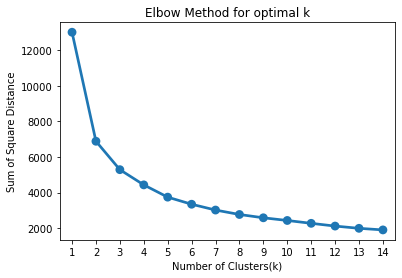

In [136]:
sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distance')
plt.title('Elbow Method for optimal k')
plt.show()

In [162]:
sse=pd.DataFrame(list(sum_of_sq_dist.values()),list(sum_of_sq_dist.keys()))
sse.rename(columns={0:'sse'},inplace=True)
sse.reset_index(inplace=True)
sse.rename(columns={'index':'Clusters'},inplace=True)
sse.to_csv('sse.csv')

### we see that the optimal k = 4, since from the elbow chart we see that the sum of square distnace is suddendly decreasing at k = 4. hence the number of clusters = 4

In [137]:
#c. Analyze these clusters and comment on the results.
# Building the Model:

Kmean_cluster = KMeans(n_clusters=5, init='k-means++', max_iter=1000)
Kmean_cluster.fit(scaled_data)

RFM_table['Cluster']=Kmean_cluster.labels_
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_Score,Customer_segment,Cluster
0,12347.0,1,182,"4,310.00",1,4,4,144,9,Silver,2
1,12348.0,74,31,"1,797.24",3,2,4,324,9,Silver,1
2,12349.0,18,73,"1,757.55",2,3,4,234,9,Silver,1
3,12350.0,309,17,334.40,4,1,2,412,7,Gold,0
4,12352.0,35,85,"2,506.04",2,3,4,234,9,Silver,1


In [138]:
RFM_table.to_csv('RFM_table.csv')

In [139]:
RFM_table['Cluster'].value_counts()

0    1234
1    1036
4     741
3     710
2     616
Name: Cluster, dtype: int64

In [140]:
from sklearn.manifold import TSNE
model = TSNE(random_state=1)
transformed = model.fit_transform(RFM_table.drop('Customer_segment',axis=1))


In [141]:
transformed

array([[-43.695126,  24.341118],
       [-19.884163,  41.356407],
       [-19.579222,  41.004086],
       ...,
       [-29.83471 , -15.503911],
       [-60.426422, -34.93021 ],
       [-58.80613 , -34.27593 ]], dtype=float32)

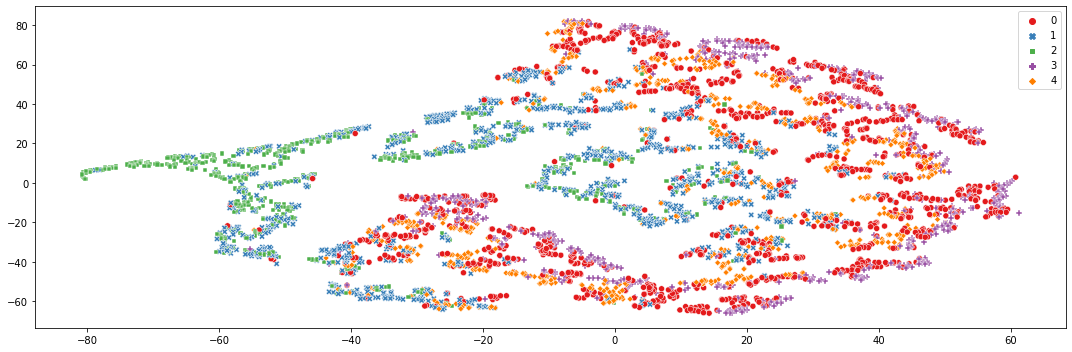

In [142]:
plt.figure(figsize=(15, 5))
cluster_labels =Kmean_cluster.labels_
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
plt.tight_layout()

In [143]:
RFM_table.head(2)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_Score,Customer_segment,Cluster
0,12347.0,1,182,"4,310.00",1,4,4,144,9,Silver,2
1,12348.0,74,31,"1,797.24",3,2,4,324,9,Silver,1


<AxesSubplot:xlabel='Metric', ylabel='Value'>

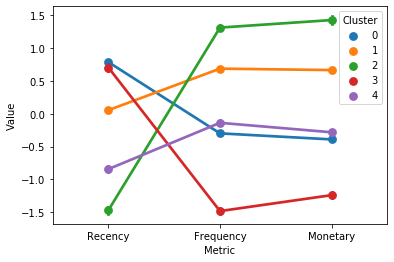

In [144]:
RFM_table_new=RFM_table[['Recency','Frequency','Monetary']]
rfm_scaled_1 = pd.DataFrame(scaled_data, index=RFM_table_new.index, columns=RFM_table_new.columns)
rfm_scaled_1['Cluster'] = Kmean_cluster.labels_
rfm_scaled_1['CustomerID'] = RFM_table['CustomerID']
df_melt = pd.melt(rfm_scaled_1.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

<AxesSubplot:xlabel='Metric', ylabel='Value'>

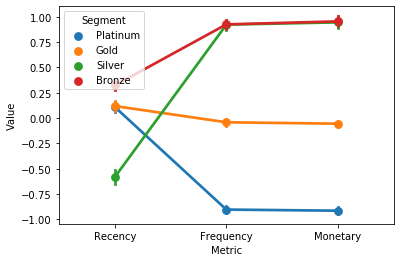

In [145]:
RFM_table_new=RFM_table[['Recency','Frequency','Monetary']]
rfm_scaled_2 = pd.DataFrame(scaled_data, index=RFM_table_new.index, columns=RFM_table_new.columns)
rfm_scaled_2['Segment'] = RFM_table['Customer_segment']
rfm_scaled_2['CustomerID'] = RFM_table['CustomerID']
df_melt = pd.melt(rfm_scaled_2.reset_index(), 
                        id_vars=['CustomerID', 'Segment'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Segment')

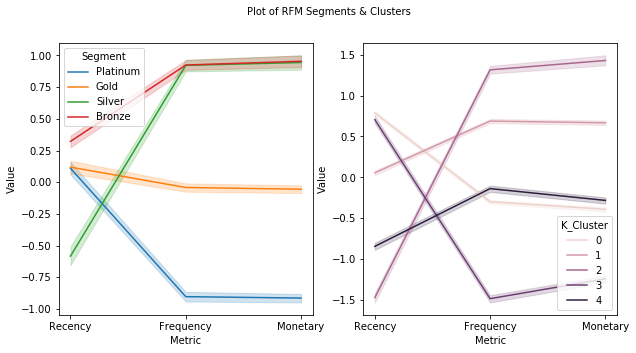

In [146]:
RFM_table_new=RFM_table[['Recency','Frequency','Monetary']]
rfm_scaled = pd.DataFrame(scaled_data,index=RFM_table_new.index,columns=RFM_table_new.columns)
RFM_table_new=RFM_table[['Recency','Frequency','Monetary']]
rfm_scaled = pd.DataFrame(scaled_data,index=RFM_table_new.index,columns=RFM_table_new.columns)
rfm_scaled.head()

rfm_scaled['K_Cluster'] = Kmean_cluster.labels_
rfm_scaled['Segment'] = RFM_table['Customer_segment']
rfm_scaled['CustomerID'] = RFM_table['CustomerID']
#rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

rfm_melt = pd.melt(rfm_scaled,id_vars=['CustomerID','Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Plot of RFM Segments & Clusters",fontsize=10)
plt.show()

In [147]:
#****************************************************************************************************************#

# Project Task: Week 4

Data Reporting:​​​​​​​

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

https://public.tableau.com/views/Project3RetailCapstoneDataScience/Clusters?:language=en-US&:display_count=n&:origin=viz_share_link